In [214]:
from exception import (
    PCARetryLimitExceededError,
)
import matplotlib
from classifier import (
    Ada,
    KNN,
    SVM,
)
from utils import (
    Constant,
)
from utils.globals import (
    os,
    np,
    cv2,
    plt,
)
from preprocess import (
    get_data_for_image,
    pca_transform,
)

In [215]:
def fetch_images(image1_path, image2_path) -> (np.array, np.array):
    image1 = cv2.imread(image1_path)
    image2 = cv2.imread(image2_path)

    return image1, image2

In [216]:
def load_data_for_image_paths(image1_path, image2_path):
    image1, image2 = fetch_images(image1_path, image2_path)

    X_1 = np.array(get_data_for_image(image1))
    X_2 = np.array(get_data_for_image(image2))

    X_1 = pca_transform(X_1, min_components=6)
    X_2 = pca_transform(X_2, min_components=6)

    X = []
    for i in range(min(len(X_1), len(X_2))):
        X.append(np.concatenate([X_1[i], X_2[i]]))
    X = np.array(X)

    return X

In [217]:
def get_classifiers(clfs):
    classifiers = []
    for classifier_name in clfs:
        if classifier_name == 'ada':
            classifier = Ada()
        if classifier_name == 'knn':
            classifier = KNN()
        if classifier_name == 'svm':
            classifier = SVM()

        classifier.load_weights()
        classifiers.append(classifier)

    return classifiers

In [250]:
def get_score_for_classifiers(image1_path, image2_path, title):
    X = load_data_for_image_paths(image1_path, image2_path)

    classifiers = get_classifiers(['ada', 'knn', 'svm'])
    predictions_average = []
    predictions_median = []
    for classifier in classifiers:
        Y_pred = classifier.predict_proba(X)

        similar_prediction_score = [preds_per_line[1] for preds_per_line in Y_pred]
        predictions_average.append(np.average(similar_prediction_score))
        predictions_median.append(np.median(similar_prediction_score))

    fig, ax = plt.subplots(figsize=(16, 9))
    ax.set_title(title)

    labels = ['AdaBoost', 'KNN', 'SVM', 'AdaBoost + KNN', 'AdaBoost + SVM', 'KNN + SVM', 'AdaBoost + KNN + SVM']
    y_average = [
        int(predictions_average[0] * 100),
        int(predictions_average[1] * 100),
        int(predictions_average[2] * 100),
        int(np.average([predictions_average[0], predictions_average[1]]) * 100),
        int(np.average([predictions_average[0], predictions_average[2]]) * 100),
        int(np.average([predictions_average[1], predictions_average[2]]) * 100),
        int(np.average([predictions_average[0], predictions_average[1], predictions_average[2]]) * 100),
    ]
    y_median = [
        int(predictions_median[0] * 100),
        int(predictions_median[1] * 100),
        int(predictions_median[2] * 100),
        int(np.mean([predictions_median[0], predictions_median[1]]) * 100),
        int(np.mean([predictions_median[0], predictions_median[2]]) * 100),
        int(np.mean([predictions_median[1], predictions_median[2]]) * 100),
        int(np.mean([predictions_median[0], predictions_median[1], predictions_median[2]]) * 100),
    ]
    x = np.arange(len(labels))
    width = 0.35
    ax.bar(x - width / 2, y_average, width, label='Average')
    ax.bar(x + width / 2, y_median, width, label='Median')
    ax.set_ylim([0, 100])
    ax.set_ylabel('Classifier scores')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    fig.tight_layout()
    plt.show()

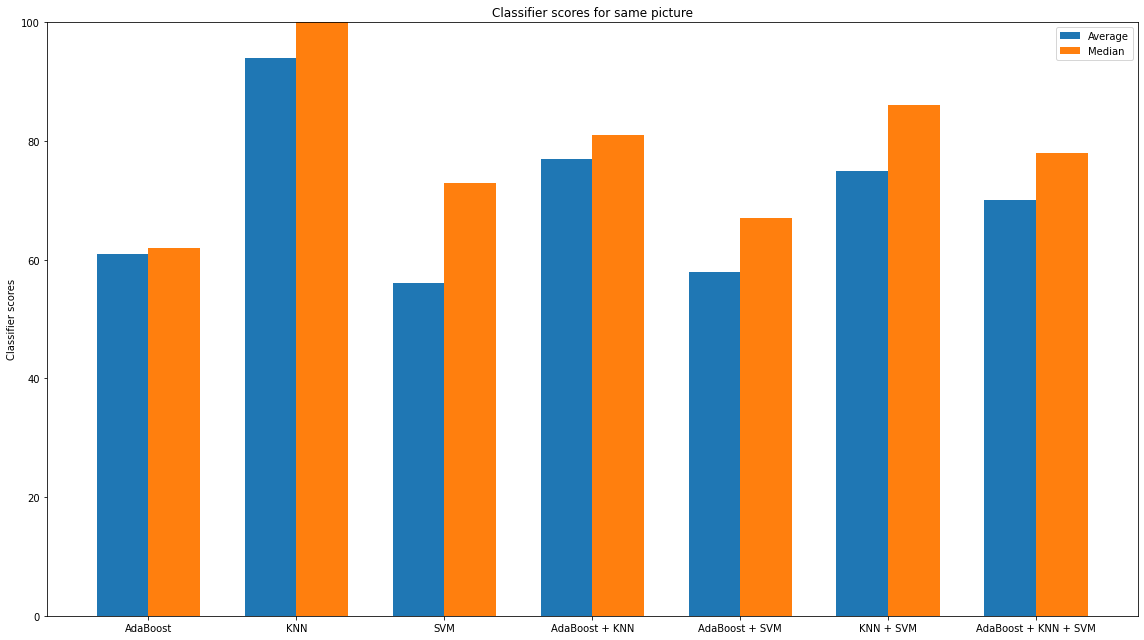

In [252]:
get_score_for_classifiers(
    image1_path=os.path.join(Constant.DATASET_PREPARED_IMAGES_PATH, '2', '1.png'),
    image2_path=os.path.join(Constant.DATASET_PREPARED_IMAGES_PATH, '2', '1.png'),
    title='Classifier scores for same picture',
)

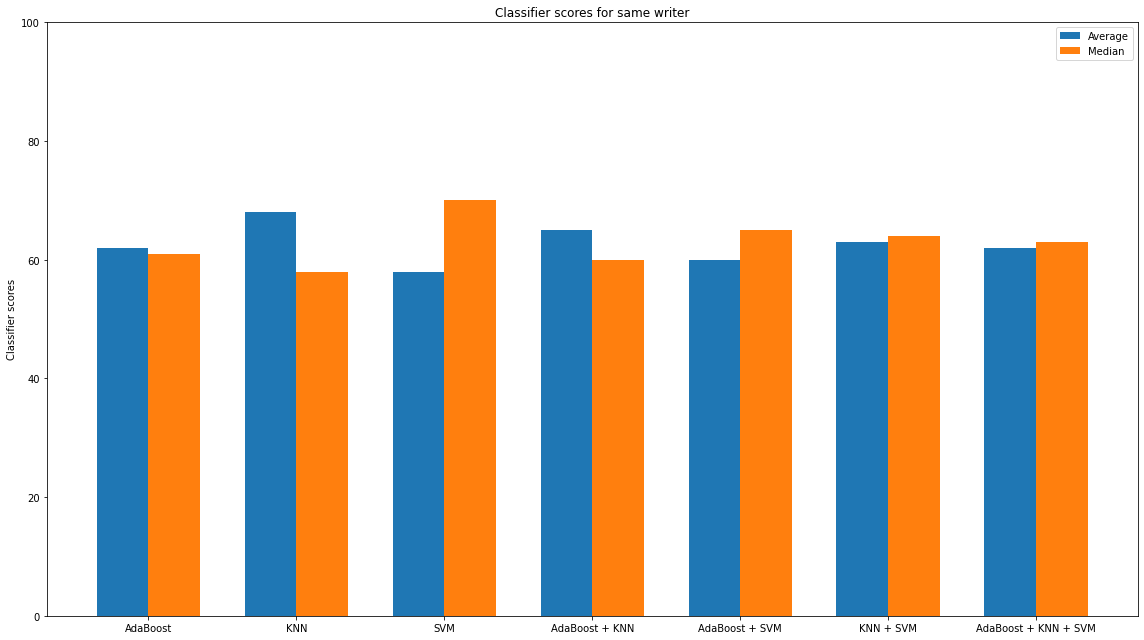

In [254]:
get_score_for_classifiers(
    image1_path=os.path.join(Constant.DATASET_PREPARED_IMAGES_PATH, '2', '0.png'),
    image2_path=os.path.join(Constant.DATASET_PREPARED_IMAGES_PATH, '2', '1.png'),
    title='Classifier scores for same writer',
)

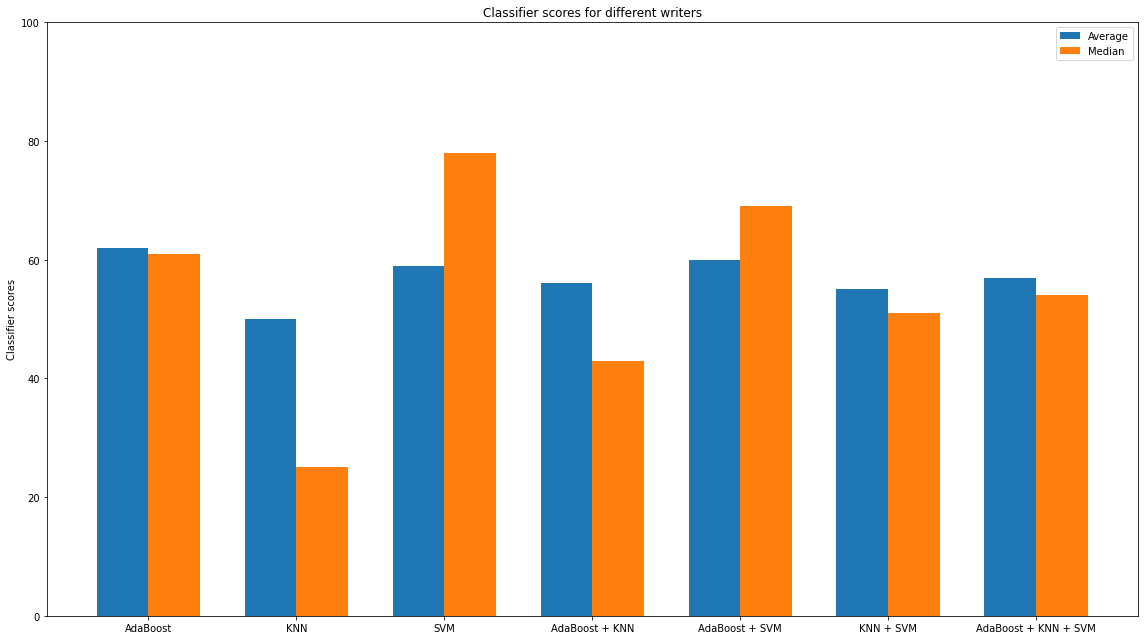

In [258]:
get_score_for_classifiers(
    image1_path=os.path.join(Constant.DATASET_PREPARED_IMAGES_PATH, '2', '0.png'),
    image2_path=os.path.join(Constant.DATASET_PREPARED_IMAGES_PATH, '14', '1.png'),
    title='Classifier scores for different writers',
)